In [1]:
import jovian

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=20,12

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot, iplot

import folium

In [3]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/kankit08/covid-19-data-analysis-script


'https://jovian.ml/kankit08/covid-19-data-analysis-script'

In [4]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
# importing dataset
df = pd.read_excel("covid_data.xlsx")

In [6]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [8]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/covid-19-data-analysis-script" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/kankit08/covid-19-data-analysis-script


'https://jovian.ml/kankit08/covid-19-data-analysis-script'

In [9]:
# drop S.No column
df.drop(['S. No.'], axis=1, inplace=True)

In [10]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [11]:
# To add two columns data and create a third column for it
df['Total_cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [13]:
# sum of total cases
total_overall_cases = df['Total_cases'].sum()
print("Total overall cases in India till now is {}".format(total_overall_cases))

Total overall cases in India till now is 729


In [14]:
df['Active_cases'] = df['Total_cases'] - (df['Cured'] + df['Death'])

In [15]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases,Active_cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/covid-19-data-analysis-script" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/kankit08/covid-19-data-analysis-script


'https://jovian.ml/kankit08/covid-19-data-analysis-script'

In [17]:
# To show highest active cases
#first method

df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases,Active_cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [18]:
# Second method

Total_active_cases = df.groupby('Name of State / UT')['Active_cases'].sum().sort_values(ascending=False).to_frame()
Total_active_cases.style.background_gradient(cmap='Reds')

,Active_cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/covid-19-data-analysis-script" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/kankit08/covid-19-data-analysis-script


'https://jovian.ml/kankit08/covid-19-data-analysis-script'

In [ ]:
#### Graphical Representation 

<AxesSubplot:xlabel='Name of State / UT'>

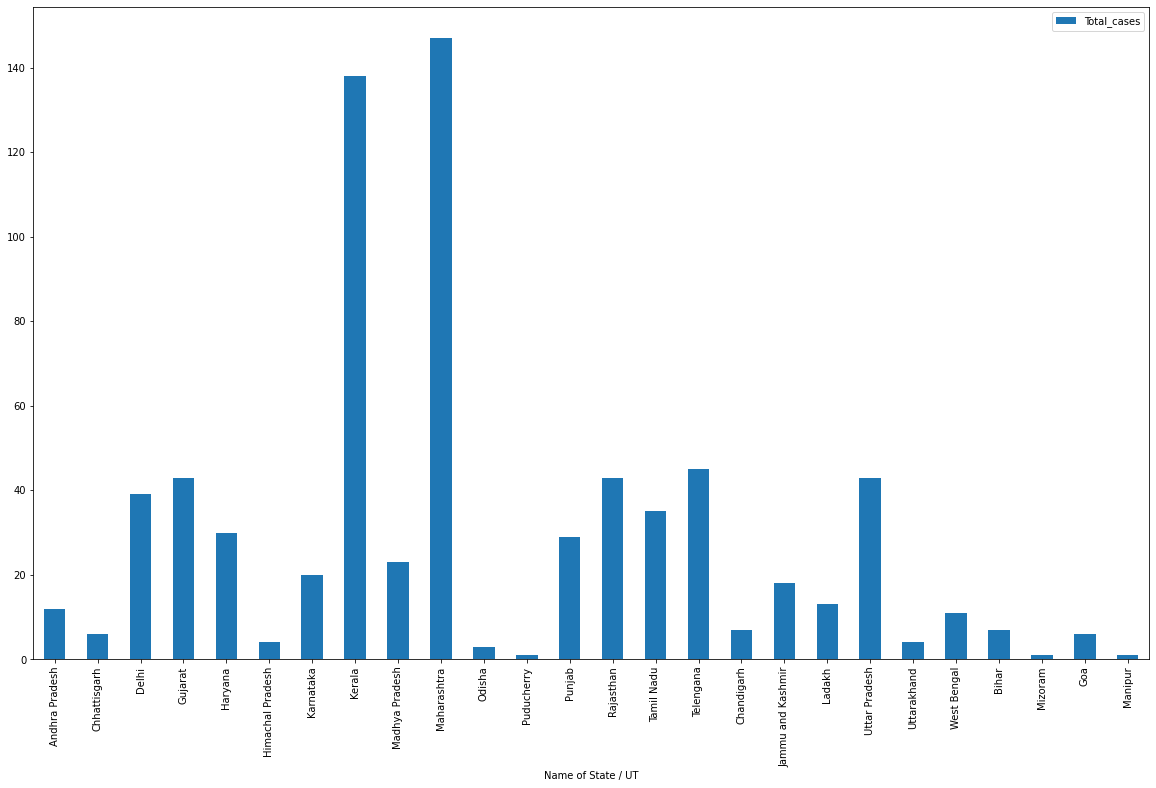

In [21]:
# Panda visualization
df.plot(kind='bar', x='Name of State / UT', y='Total_cases')

In [22]:
# Plotly Visualization
df.iplot(kind='bar', x='Name of State / UT', y='Total_cases')

In [23]:
# Plotly xpress
px.bar(df, x='Name of State / UT', y='Total_cases')

<AxesSubplot:xlabel='Name of State / UT', ylabel='Total_cases'>

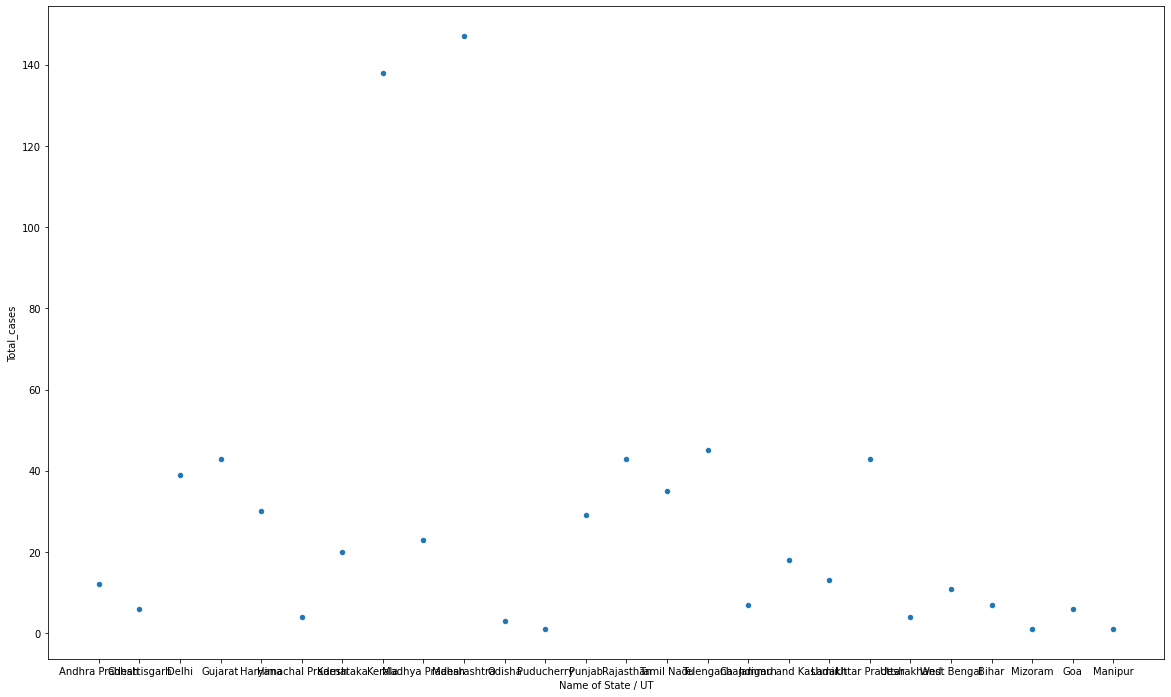

In [24]:
#scatter plot
df.plot(kind= 'scatter', x='Name of State / UT', y='Total_cases')

In [32]:
#plotly
df.iplot(kind='scatter', x='Name of State / UT', y='Total_cases', mode='markers+lines',
        title='Covid-19 Graph', xTitle='Name of State / UT', yTitle='Total_cases', colors='red', size=12)

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/covid-19-data-analysis-script" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/kankit08/covid-19-data-analysis-script


'https://jovian.ml/kankit08/covid-19-data-analysis-script'

In [34]:
# impoting coordinates data
indian_coord = pd.read_excel("Indian Coordinates.xlsx")

In [35]:
indian_coord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [36]:
# merging coordinates data with df
df_full = pd.merge(indian_coord, df, on='Name of State / UT')

In [37]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases,Active_cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [43]:
map=folium.Map(location=[20,70],zoom_start=5,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total_cases'],
                                df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+
    '<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',
                        fill_opacity=0.3).add_to(map)

In [44]:
map

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/covid-19-data-analysis-script" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/kankit08/covid-19-data-analysis-script


'https://jovian.ml/kankit08/covid-19-data-analysis-script'

In [48]:
# importing dataset of per_day_cases_inIndia
pdc_India = pd.read_excel("per_day_cases.xlsx", parse_dates=True, sheet_name='India')
pdc_Italy = pd.read_excel("per_day_cases.xlsx", parse_dates=True, sheet_name='Italy')
pdc_Korea = pd.read_excel("per_day_cases.xlsx", parse_dates=True, sheet_name='Korea')
pdc_Wuhan = pd.read_excel("per_day_cases.xlsx", parse_dates=True, sheet_name='Wuhan')

In [49]:
pdc_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


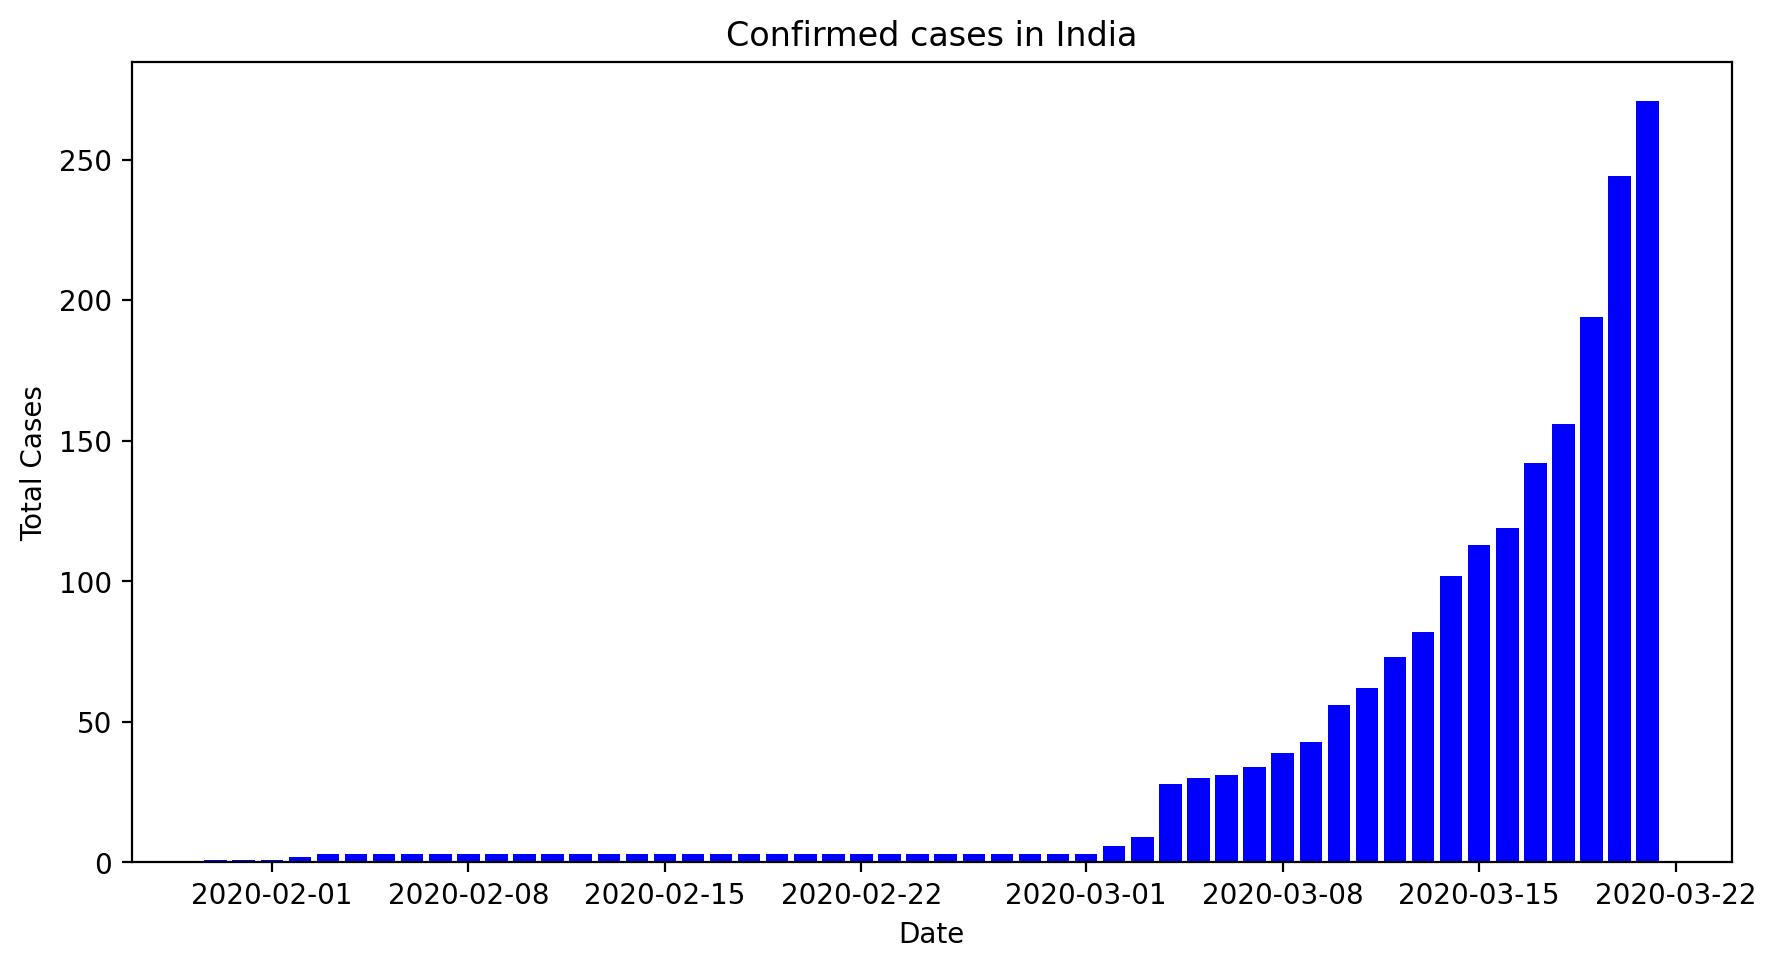

In [53]:
# representation through matplotlib

fig=plt.figure(figsize=(10,5),dpi=200)
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(pdc_India["Date"],pdc_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()

In [55]:
#plotly Express representation of confirmed cases in India

fig=px.bar(pdc_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [57]:
#plotly Express representation of confirmed cases in Italy

fig=px.bar(pdc_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()

In [58]:
#plotly Express representation of confirmed cases in Korea

fig=px.bar(pdc_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.show()

In [60]:
#plotly Express representation of confirmed cases in Korea

fig=px.bar(pdc_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/covid-19-data-analysis-script" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/kankit08/covid-19-data-analysis-script


'https://jovian.ml/kankit08/covid-19-data-analysis-script'

In [62]:
#Subplots using Bar Graph

from plotly.subplots import make_subplots

In [65]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=pdc_Korea['Date'],y=pdc_Korea['Total Cases'],
                    marker=dict(color=pdc_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=pdc_Italy['Date'],y=pdc_Italy['Total Cases'],
                    marker=dict(color=pdc_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=pdc_India['Date'],y=pdc_India['Total Cases'],
                    marker=dict(color=pdc_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=pdc_Wuhan['Date'],y=pdc_Wuhan['Total Cases'],
                    marker=dict(color=pdc_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [ ]:
#Scatter plot

In [67]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=pdc_Korea['Date'],y=pdc_Korea['Total Cases'],
                    marker=dict(color=pdc_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=pdc_Italy['Date'],y=pdc_Italy['Total Cases'],
                    marker=dict(color=pdc_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=pdc_India['Date'],y=pdc_India['Total Cases'],
                    marker=dict(color=pdc_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=pdc_Wuhan['Date'],y=pdc_Wuhan['Total Cases'],
                    marker=dict(color=pdc_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [68]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/covid-19-data-analysis-script" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/kankit08/covid-19-data-analysis-script


'https://jovian.ml/kankit08/covid-19-data-analysis-script'

In [71]:
covid19_df = pd.read_csv("covid_19_data.csv",parse_dates=['Last Update'])

In [73]:
#Renaming a column
covid19_df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [74]:
covid19_df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [76]:
confirmed=covid19_df.groupby('Date').sum()['Confirmed'].reset_index()
death=covid19_df.groupby('Date').sum()['Deaths'].reset_index()
rec=covid19_df.groupby('Date').sum()['Recovered'].reset_index()

In [77]:
# represent world covid graph

fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))

In [78]:
#
df_confirmed = pd.read_csv("time_series_covid_19_confirmed.csv")

In [79]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [81]:
df_latlong=pd.merge(covid19_df,df_confirmed,on=['Country','Province/State'])

In [82]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,5879,03/15/2020,NaN,Saint Vincent and the Grenadines,2020-03-14 16:33:03,1.0,0.0,0.0,12.9843,-61.2872,...,0,0,0,0,0,0,0,0,0,1
3286,5625,03/14/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3287,5881,03/15/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3288,5628,03/14/2020,"Virgin Islands, U.S.",US,2020-03-14 16:15:18,1.0,0.0,0.0,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1


In [83]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [84]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kankit08/covid-19-data-analysis-script" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/kankit08/covid-19-data-analysis-script


'https://jovian.ml/kankit08/covid-19-data-analysis-script'